## Projet 2021-2022 / Yu Rui ; Nicolas Diaz

#### Charger Dataset

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from boruta import BorutaPy

In [4]:
df = pd.read_csv('dataset.csv', index_col = 'ID', sep=';')
df

,PAT_SEX,PAT_AGE,VAL_I1,VAL_I2,VAL_C1,VAL_PM1,VAL_PM2,VAL_M1,VAL_M2,VAL_M3
ID,,,,,,,,,,
1,2,4.58,C,C,C,C,B,E,B,0
2,2,8.26,G,G,E,E,D,G,D,0
3,2,9.04,H,H,F,E,E,G,D,0
4,2,9.86,H,H,F,F,E,H,E,0
5,2,10.35,H,H,F,F,E,G,E,0
...,...,...,...,...,...,...,...,...,...,...
7431,1,15.89,H,H,H,H,NaN,H,H,D
7432,2,12.73,H,H,G,G,F,H,F,C
7434,1,8.39,H,H,F,E,E,G,E,B


#### l'analyse exploratoire des données.

In [6]:
df.columns

Index(['PAT_SEX', 'PAT_AGE', 'VAL_I1', 'VAL_I2', 'VAL_C1', 'VAL_PM1',
       'VAL_PM2', 'VAL_M1', 'VAL_M2', 'VAL_M3'],
      dtype='object')

In [7]:
df.shape

(2847, 10)

In [8]:
df.dtypes.value_counts()

object     8
int64      1
float64    1
dtype: int64

In [9]:
for col in df.select_dtypes('object'):
    print(f'{col :=<20} {df[col].unique()}')

VAL_I1============== ['C' 'G' 'H' nan 'D' 'F' 'E']
VAL_I2============== ['C' 'G' 'H' nan 'D' 'E' 'F']
VAL_C1============== ['C' 'E' 'F' 'H' nan 'G' 'D']
VAL_PM1============= ['C' 'E' 'F' 'H' nan 'G' 'D' 'B' 'A']
VAL_PM2============= ['B' 'D' 'E' 'H' nan 'F' 'G' 'C' 'A']
VAL_M1============== ['E' 'G' 'H' nan 'F' 'D' 'C']
VAL_M2============== ['B' 'D' 'E' 'G' 'H' nan 'F' 'C' 'A']
VAL_M3============== ['0' 'D' 'E' 'B' 'C' nan 'H' 'F' 'A' '1' 'G']


Valeurs NAN Manquent

<AxesSubplot:ylabel='ID'>

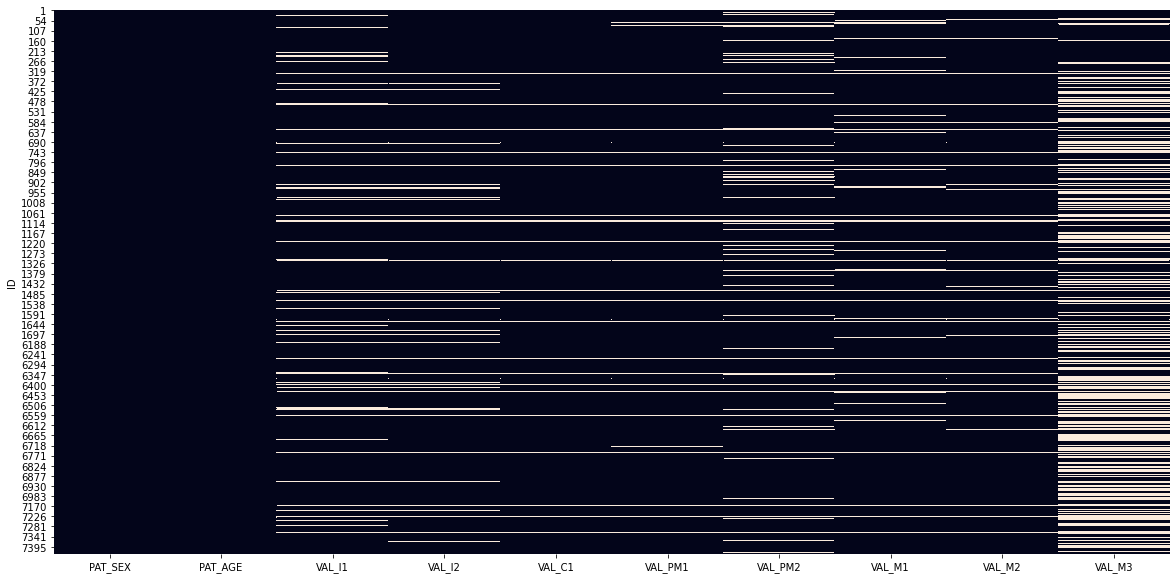

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [11]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True) ##Pourcentage des valeurs manquent

PAT_SEX    0.000000
PAT_AGE    0.000000
VAL_PM1    0.057956
VAL_C1     0.061468
VAL_M2     0.067791
VAL_M1     0.082894
VAL_I2     0.096242
VAL_I1     0.111345
VAL_PM2    0.124341
VAL_M3     0.385318
dtype: float64

#### Mesuere statistique

Moyenne

In [5]:
df_num = df.replace({'A' : 2, 'B' : 3, 'C' : 4, 'D' : 5, 'E' : 6, 'F' : 7, 'G' : 8, 'H' : 9})
df_num["VAL_M3"] = pd.to_numeric(df_num["VAL_M3"])
df1 = df_num.drop(columns = ['PAT_SEX'])
df_mean = np.mean(df1)
print("Moyenne:\n",df_mean)

Moyenne:
 PAT_AGE    12.329045
VAL_I1      8.463241
VAL_I2      8.232414
VAL_C1      7.584955
VAL_PM1     7.445936
VAL_PM2     6.991978
VAL_M1      8.388357
VAL_M2      6.854559
VAL_M3      4.856571
dtype: float64


Text(0.5, 1.0, 'Moyenne')

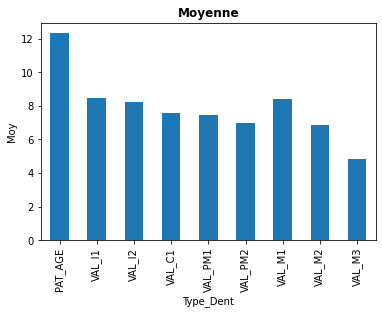

In [10]:
moy_gr = df_mean.plot.bar()
plt.xlabel('Type_Dent')
plt.ylabel('Moy')
plt.title('Moyenne',fontweight ="bold")

L'ecart

In [11]:
ecart_type = np.std(df1)
print("L'ecart-type:\n",ecart_type)

L'ecart-type:
 PAT_AGE    5.253317
VAL_I1     1.065648
VAL_I2     1.304573
VAL_C1     1.572204
VAL_PM1    1.705439
VAL_PM2    1.930588
VAL_M1     0.944294
VAL_M2     1.874939
VAL_M3     2.533546
dtype: float64


Text(0.5, 1.0, 'l’écart-type')

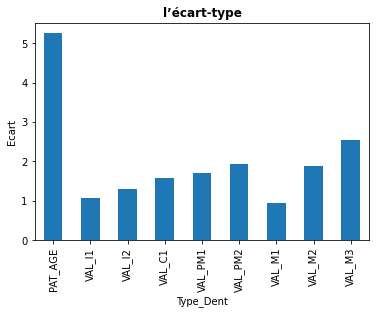

In [12]:
ecart_grap = ecart_type.plot.bar()
plt.xlabel('Type_Dent')
plt.ylabel('Ecart')
plt.title('l’écart-type',fontweight ="bold")

Histogrames des variables continues

Text(0.5, 1.0, 'Type Dient: VAL_I1')

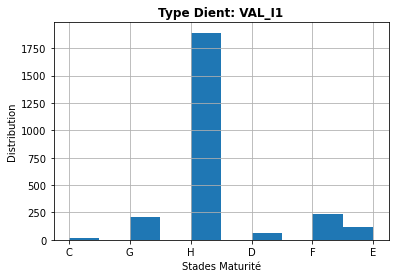

In [13]:
df['VAL_I1'].hist(label='VAL_I1')
plt.xlabel('Stades Maturité')
plt.ylabel('Distribution')
plt.title('Type Dient: VAL_I1',fontweight ="bold")

Text(0.5, 1.0, 'Type Dient: VAL_I2')

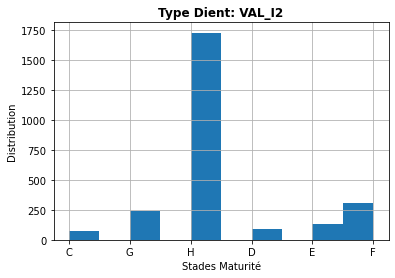

In [14]:
df['VAL_I2'].hist(label='VAL_I2')
plt.xlabel('Stades Maturité')
plt.ylabel('Distribution')
plt.title('Type Dient: VAL_I2',fontweight ="bold")

Text(0.5, 1.0, 'Type Dient: VAL_C1')

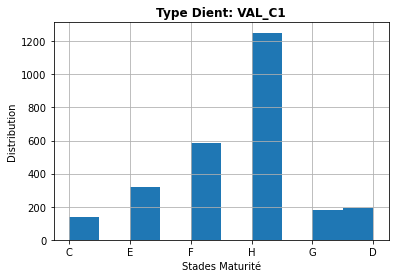

In [31]:
df['VAL_C1'].hist(label='VAL_C1')
plt.xlabel('Stades Maturité')
plt.ylabel('Distribution')
plt.title('Type Dient: VAL_C1',fontweight ="bold")

Text(0.5, 1.0, 'Type Dient: VAL_PM2')

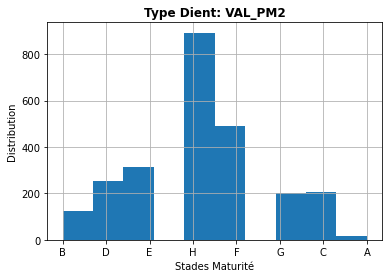

In [32]:
df['VAL_PM2'].hist(label='VAL_PM2')
#df2['VAL_PM2'].hist(bin = 25)
plt.xlabel('Stades Maturité')
plt.ylabel('Distribution')
plt.title('Type Dient: VAL_PM2',fontweight ="bold")

Text(0.5, 1.0, 'Type Dient: VAL_M1')

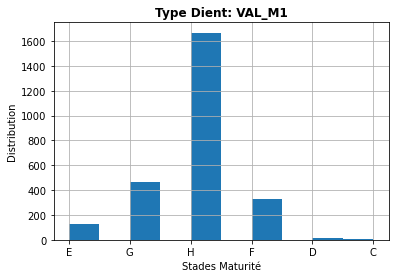

In [33]:
df['VAL_M1'].hist(label='VAL_M1')
plt.xlabel('Stades Maturité')
plt.ylabel('Distribution')
plt.title('Type Dient: VAL_M1',fontweight ="bold")

Text(0.5, 1.0, 'Type Dient: VAL_M2')

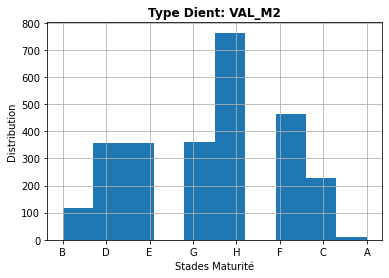

In [34]:
df['VAL_M2'].hist(label='VAL_M2')
plt.xlabel('Stades Maturité')
plt.ylabel('Distribution')
plt.title('Type Dient: VAL_M2',fontweight ="bold")

Text(0.5, 1.0, 'Type Dient: VAL_M3')

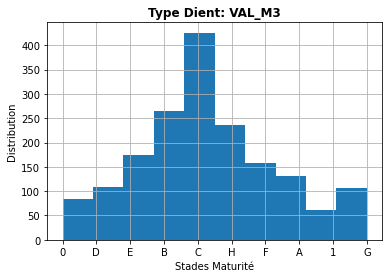

In [35]:
df['VAL_M3'].hist(label='VAL_M3')
plt.xlabel('Stades Maturité')
plt.ylabel('Distribution')
plt.title('Type Dient: VAL_M3',fontweight ="bold")

#### Nettoyage des données.

In [6]:
df_num = df.replace({'A' : 2, 'B' : 3, 'C' : 4, 'D' : 5, 'E' : 6, 'F' : 7, 'G' : 8, 'H' : 9})
df_num["VAL_M3"] = pd.to_numeric(df_num["VAL_M3"])
# df.describe()
df_num

,PAT_SEX,PAT_AGE,VAL_I1,VAL_I2,VAL_C1,VAL_PM1,VAL_PM2,VAL_M1,VAL_M2,VAL_M3
ID,,,,,,,,,,
1,2,4.58,4.0,4.0,4.0,4.0,3.0,6.0,3.0,0.0
2,2,8.26,8.0,8.0,6.0,6.0,5.0,8.0,5.0,0.0
3,2,9.04,9.0,9.0,7.0,6.0,6.0,8.0,5.0,0.0
4,2,9.86,9.0,9.0,7.0,7.0,6.0,9.0,6.0,0.0
5,2,10.35,9.0,9.0,7.0,7.0,6.0,8.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7431,1,15.89,9.0,9.0,9.0,9.0,NaN,9.0,9.0,5.0
7432,2,12.73,9.0,9.0,8.0,8.0,7.0,9.0,7.0,4.0
7434,1,8.39,9.0,9.0,7.0,6.0,6.0,8.0,6.0,3.0


In [4]:
df_num.describe()

,PAT_SEX,PAT_AGE,VAL_I1,VAL_I2,VAL_C1,VAL_PM1,VAL_PM2,VAL_M1,VAL_M2,VAL_M3
count,2847.000000,2847.000000,2530.000000,2573.000000,2672.000000,2682.000000,2493.000000,2611.000000,2654.000000,1750.000000
mean,1.511416,12.329045,8.463241,8.232414,7.584955,7.445936,6.991978,8.388357,6.854559,4.856571
std,0.499957,5.254240,1.065858,1.304827,1.572498,1.705757,1.930976,0.944475,1.875292,2.534270
min,1.000000,2.180000,4.000000,4.000000,4.000000,2.000000,2.000000,4.000000,2.000000,0.000000
25%,1.000000,8.115000,8.000000,8.000000,7.000000,6.000000,6.000000,8.000000,5.000000,3.000000
50%,2.000000,11.550000,9.000000,9.000000,8.000000,8.000000,7.000000,9.000000,7.000000,4.000000
75%,2.000000,15.550000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,7.000000
max,2.000000,23.980000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [7]:
df['VAL_M3'].fillna(0)

ID
1       0
2       0
3       0
4       0
5       0
       ..
7431    D
7432    C
7434    B
7435    0
7436    C
Name: VAL_M3, Length: 2847, dtype: object

In [8]:
df_num["PAT_AGE"] = df_num["PAT_AGE"].apply(np.round) 
df_num['VAL_M3'].fillna(value = 0, inplace = True)
df_num

,PAT_SEX,PAT_AGE,VAL_I1,VAL_I2,VAL_C1,VAL_PM1,VAL_PM2,VAL_M1,VAL_M2,VAL_M3
ID,,,,,,,,,,
1,2,5.0,4.0,4.0,4.0,4.0,3.0,6.0,3.0,0.0
2,2,8.0,8.0,8.0,6.0,6.0,5.0,8.0,5.0,0.0
3,2,9.0,9.0,9.0,7.0,6.0,6.0,8.0,5.0,0.0
4,2,10.0,9.0,9.0,7.0,7.0,6.0,9.0,6.0,0.0
5,2,10.0,9.0,9.0,7.0,7.0,6.0,8.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7431,1,16.0,9.0,9.0,9.0,9.0,NaN,9.0,9.0,5.0
7432,2,13.0,9.0,9.0,8.0,8.0,7.0,9.0,7.0,4.0
7434,1,8.0,9.0,9.0,7.0,6.0,6.0,8.0,6.0,3.0


In [9]:
df_mean = df_num.fillna(value = df_num.mean(), inplace = True)
for col in df.select_dtypes('object'):
    df_num[col] = df_num[col].round(decimals = 0)
print(df_num)

      PAT_SEX  PAT_AGE  VAL_I1  VAL_I2  VAL_C1  VAL_PM1  VAL_PM2  VAL_M1  \
ID                                                                         
1           2      5.0     4.0     4.0     4.0      4.0      3.0     6.0   
2           2      8.0     8.0     8.0     6.0      6.0      5.0     8.0   
3           2      9.0     9.0     9.0     7.0      6.0      6.0     8.0   
4           2     10.0     9.0     9.0     7.0      7.0      6.0     9.0   
5           2     10.0     9.0     9.0     7.0      7.0      6.0     8.0   
...       ...      ...     ...     ...     ...      ...      ...     ...   
7431        1     16.0     9.0     9.0     9.0      9.0      7.0     9.0   
7432        2     13.0     9.0     9.0     8.0      8.0      7.0     9.0   
7434        1      8.0     9.0     9.0     7.0      6.0      6.0     8.0   
7435        1      6.0     8.0     8.0     8.0      7.0      7.0     8.0   
7436        2     15.0     9.0     9.0     9.0      9.0      8.0     9.0   

      VAL_M

In [10]:
df_num['PAT_AGE'].value_counts().sort_values(ascending=True)

2.0       2
3.0       8
24.0     51
18.0     55
4.0      56
17.0     71
19.0     75
23.0     76
20.0     80
21.0     82
22.0    100
5.0     125
16.0    135
13.0    163
14.0    173
15.0    178
11.0    183
8.0     196
6.0     199
7.0     201
12.0    206
10.0    206
9.0     226
Name: PAT_AGE, dtype: int64

#### Preprocessing

In [8]:
df_num['PAT_AGE'].value_counts(normalize = True)

9.0     0.079382
10.0    0.072357
12.0    0.072357
7.0     0.070601
6.0     0.069898
8.0     0.068844
11.0    0.064278
15.0    0.062522
14.0    0.060766
13.0    0.057253
16.0    0.047418
5.0     0.043906
22.0    0.035125
21.0    0.028802
20.0    0.028100
23.0    0.026695
19.0    0.026344
17.0    0.024939
4.0     0.019670
18.0    0.019319
24.0    0.017914
3.0     0.002810
2.0     0.000702
Name: PAT_AGE, dtype: float64

### Données d'Entrenaiment et Test

In [11]:
X = df_num.drop(columns='PAT_AGE')
y = df_num['PAT_AGE']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.20)

### Procédure d'évaluation

In [12]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
#     print(ypred.shape)
    print("Score MAE: ",mean_absolute_error(y_test, ypred))   
    print("Score RMSE: ",np.sqrt(mean_squared_error(y_test, ypred)))   
#     print("Score MSE: ",mean_squared_error(y_test, y_pred))
#     print("Score Median AE: ",median_absolute_error(y_test, y_pred))
    
#     err_hist = np.abs(y - ypred)
#     plt.hist(err_hist, bins = 50)
#     plt.show

In [30]:
mlp = MLPRegressor(random_state=0)
xgc = xgb.XGBRegressor(random_state=0)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
tree = tree.DecisionTreeRegressor()
RDF = RandomForestRegressor(random_state=0)

In [25]:
list_models = {   
                'XGBoost' : xgc,
                'MLP': mlp,
                'SVM': regr,
                'Tree': tree,
                'RandomForest': RDF
                }

In [29]:
for name, model in list_models.items():
    print(name)
    evaluation(model)

XGBoost
Score MAE:  1.340582965967948
Score RMSE:  2.186947763511593
MLP


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score MAE:  1.454485468033123
Score RMSE:  2.255504596379445
SVM
Score MAE:  1.4322859147082114
Score RMSE:  2.311015070210536
Tree
Score MAE:  1.3761798605116935
Score RMSE:  2.2322194881624893
RandomForest
Score MAE:  1.332315433477663
Score RMSE:  2.1846813460503496


### Optimisation des modeles

SVM

In [11]:
# Ensemble des paramètres et leurs valeurs
parametres = {
                'C': [1, 10], 
                'gamma': ('scale', 'auto'),
                'kernel': ('rbf', 'poly', 'sigmoid')
             }

# GridSearchCV
modele = SVR()
grille = GridSearchCV(modele, parametres, cv = 5, n_jobs = -1, verbose = 2)
grille.fit(X_train, y_train)

# Meilleur score
print("Meilleur score :", grille.best_score_)
print("Meilleur jue de paramètres :", grille.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleur score : 0.8451461261380002
Meilleur jue de paramètres : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


Decision Tree

In [12]:
# Ensemble des paramètres et leurs valeurs
parametres = {
              "criterion": ("mse", "mae"),
              "min_samples_split": (10, 20, 40),
              "max_depth": (10, 40, 100),
              "min_samples_leaf": (20, 40, 100),
              "max_leaf_nodes" : (10, 40, 100)
             }

# GridSearchCV
modele = tree.DecisionTreeRegressor()
grille = GridSearchCV(modele, parametres, cv = 5, n_jobs = -1, verbose = 2)
grille.fit(X_train, y_train)

# Meilleur score
print("Meilleur score :", grille.best_score_)
print("Meilleur jue de paramètres :", grille.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Meilleur score : 0.840744636570915
Meilleur jue de paramètres : {'criterion': 'mse', 'max_depth': 10, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 40}


MLP

In [13]:
# Ensemble des paramètres et leurs valeurs
parametres = {'hidden_layer_sizes':[80,100],
              'activation':('tanh','relu'),
              'solver':('lbfgs','sgd','adam'),
              'learning_rate':('constant','adaptive')
             }

# GridSearchCV
modele = MLPRegressor()
grille = GridSearchCV(modele, parametres, cv = 5, n_jobs = -1, verbose = 2)
grille.fit(X_train, y_train)

# Meilleur score
print("Meilleur score :", grille.best_score_)
print("Meilleur jue de paramètres :", grille.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleur score : 0.8445847468148461
Meilleur jue de paramètres : {'activation': 'tanh', 'hidden_layer_sizes': 80, 'learning_rate': 'constant', 'solver': 'lbfgs'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


XGBoost

In [14]:
# Ensemble des paramètres et leurs valeurs
parametres = { 'max_depth': (2, 4, 6),
           'n_estimators': (100, 500, 1000),
           'colsample_bytree': (0.2, 0.6, 0.8),
           'min_child_weight': (3, 5, 7),
           'gamma': (0, 1, 5),
           'subsample': (0.4, 0.6, 0.8)
              }

# GridSearchCV
modele = xgb.XGBRegressor()
grille = GridSearchCV(modele, parametres, cv = 5, n_jobs = -1, verbose = 2)
grille.fit(X_train, y_train)

# Meilleur score
print("Meilleur score :", grille.best_score_)
print("Meilleur jue de paramètres :", grille.best_params_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Meilleur score : 0.8512916435708622
Meilleur jue de paramètres : {'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}


Random Rorest

In [20]:
# Ensemble des paramètres et leurs valeurs
# parametres = { 
#     'n_estimators': (100, 150, 200, 250, 300),
#     'max_depth': (1,2,3,4)
#               }

parametres = { 
    'n_estimators': [100, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4]
}

# GridSearchCV
modele = RandomForestRegressor(random_state=0)
grille = GridSearchCV(modele, parametres, cv = 5, n_jobs = -1, verbose = 2)
grille.fit(X_train, y_train)

# Meilleur score
print("Meilleur score :", grille.best_score_)
print("Meilleur jue de paramètres :", grille.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   16.2s finished


Meilleur score : 0.827593851908073
Meilleur jue de paramètres : {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}


## L'utilisation de Boruta pour selectioner les mieux features

Une fois que le modèle optimal pour l'entreiment et la prédiction a été identifié. Nous déterminons les meilleures caractéristiques pour optimiser davantage le modèle.

In [26]:
trans = BorutaPy(RDF, random_state=42, verbose=2)
sel = trans.fit_transform(X.values, y.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	4


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	4


In [27]:
trans.support_

array([False, False,  True,  True,  True, False, False,  True,  True])

In [28]:
X.columns[trans.support_]

Index(['VAL_I2', 'VAL_C1', 'VAL_PM1', 'VAL_M2', 'VAL_M3'], dtype='object')

In [31]:
# Transformer le dataset pour supprimer les features non importantes
X_trans  = trans.transform(X.values)

In [40]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_trans, y,  test_size = 0.20)

In [39]:
grille.fit(X_train_b, y_train_b)

# Meilleur score
print("Meilleur score :", grille.best_score_)
print("Meilleur jue de paramètres :", grille.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   19.3s finished


Meilleur score : 0.8366640698210415
Meilleur jue de paramètres : {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 300}
